In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                       Infinite Painter       ART_AND_DESIGN   
8                                   Garden Coloring Book       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                               Text on Photo - Fonteee       ART_AND_DESIGN   
11               Name Art Ph

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [11]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)


In [12]:
#Cleaning no of installs classification
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [13]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [14]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [15]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [16]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [17]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)


In [18]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int32
Genres            9360 non-null object
Category_c        9360 non-null int32
Genres_c          9360 non-null int32
dtypes: float64(3), int32(4), int64(2), object(2)
memory usage: 731.2+ KB


In [20]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [21]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])

In [22]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
knn = KNeighborsClassifier()


In [24]:
# split the train test sets
from sklearn.model_selection import train_test_split

In [25]:
df2.loc[df['Rating'] < 3, 'Rating'] = 0.
df2.loc[df['Rating'] >= 3, 'Rating' ] = 1

In [26]:
df2.Rating.astype('int64')

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
        ..
10795    1
10796    1
10797    1
10799    1
10800    1
10801    1
10802    1
10803    1
10804    1
10805    1
10809    1
10810    1
10812    1
10814    1
10815    1
10817    1
10819    1
10820    1
10826    1
10827    1
10828    1
10829    1
10830    1
10832    1
10833    1
10834    1
10836    1
10837    1
10839    1
10840    1
Name: Rating, Length: 9360, dtype: int64

In [27]:
X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model = KNeighborsClassifier()

In [28]:
y_d


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
30       1.0
31       1.0
        ... 
10795    1.0
10796    1.0
10797    1.0
10799    1.0
10800    1.0
10801    1.0
10802    1.0
10803    1.0
10804    1.0
10805    1.0
10809    1.0
10810    1.0
10812    1.0
10814    1.0
10815    1.0
10817    1.0
10819    1.0
10820    1.0
10826    1.0
10827    1.0
10828    1.0
10829    1.0
10830    1.0
10832    1.0
10833    1.0
10834    1.0
10836    1.0
10837    1.0
10839    1.0
10840    1.0
Name: Rating, Length: 9360, dtype: float64

In [29]:
X_d

,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,167,5600000.0,50000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,178,19000000.0,50000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,36815,29000000.0,1000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,13791,33000000.0,1000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,121,3100000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
knn.fit(X_train_d, y_train_d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
pred = knn.predict(X_test_d)
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

In [32]:
acc = accuracy_score(y_test_d,pred)

In [33]:
print('accuracy is: ',acc)

accuracy is:  0.9615384615384616


In [34]:
auc = roc_auc_score(y_test_d,pred)

In [35]:
print(auc)

0.49907578558225507


In [36]:
knn.predict(X_test_d).shape

(2808,)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [38]:
print(classification_report(y_test_d, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       103
         1.0       0.96      1.00      0.98      2705

    accuracy                           0.96      2808
   macro avg       0.48      0.50      0.49      2808
weighted avg       0.93      0.96      0.94      2808



In [39]:
cm = confusion_matrix(y_test_d, pred)

In [40]:
cm

array([[   0,  103],
       [   5, 2700]], dtype=int64)

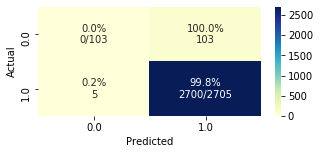

In [41]:
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test_d), columns=np.unique(y_test_d))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

In [42]:
np.unique(y_test_d, return_counts=True)

(array([0., 1.]), array([ 103, 2705], dtype=int64))

In [43]:
2718 / (2718 + 4)

0.9985304922850845

In [44]:
2718 / (2718 + 86)

0.9693295292439372

In [45]:
2718 + 4

2722

In [46]:
print('precision is: ',2718 / (2718 + 86))

precision is:  0.9693295292439372


In [47]:
print('recall is: ',115 / 2718 / (2718 + 4))

recall is:  1.554390978801351e-05


In [48]:
np.unique(y_test_d, return_counts=True)

(array([0., 1.]), array([ 103, 2705], dtype=int64))

In [49]:
neighs_num = np.arange(1, 18,2)

In [50]:
from sklearn.metrics import precision_score, recall_score

In [51]:
y_preds_n = []
for n in np.arange(1, 12,2):
    knn_n = KNeighborsClassifier(n)
    knn_n.fit(X_train_d, y_train_d)
    y_preds_n = knn_n.predict(X_test_d)
    print('REPORT FOR ', n , ' neigbors. Accuracy is: ',accuracy_score(y_test_d, pred),
    '\nprecision is: ',precision_score(y_test_d, pred),
    'recall is: ',recall_score(y_test_d, pred))

REPORT FOR  1  neigbors. Accuracy is:  0.9615384615384616 
precision is:  0.9632536567962897 recall is:  0.9981515711645101
REPORT FOR  3  neigbors. Accuracy is:  0.9615384615384616 
precision is:  0.9632536567962897 recall is:  0.9981515711645101
REPORT FOR  5  neigbors. Accuracy is:  0.9615384615384616 
precision is:  0.9632536567962897 recall is:  0.9981515711645101
REPORT FOR  7  neigbors. Accuracy is:  0.9615384615384616 
precision is:  0.9632536567962897 recall is:  0.9981515711645101
REPORT FOR  9  neigbors. Accuracy is:  0.9615384615384616 
precision is:  0.9632536567962897 recall is:  0.9981515711645101
REPORT FOR  11  neigbors. Accuracy is:  0.9615384615384616 
precision is:  0.9632536567962897 recall is:  0.9981515711645101


# Logistic Regression LAB_2

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train_d, y_train_d)

C:\Users\Abila\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and calculating the accuracy

In [54]:
y_pred = logreg.predict(X_test_d)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_d, y_test_d)))

Accuracy of logistic regression classifier on test set: 0.96


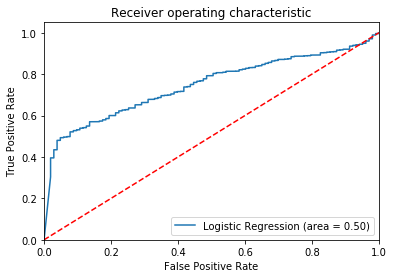

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_d, logreg.predict(X_test_d))
fpr, tpr, thresholds = roc_curve(y_test_d, logreg.predict_proba(X_test_d)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_d, y_pred)
print(confusion_matrix)

[[   0  103]
 [   0 2705]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test_d, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       103
         1.0       0.96      1.00      0.98      2705

    accuracy                           0.96      2808
   macro avg       0.48      0.50      0.49      2808
weighted avg       0.93      0.96      0.95      2808



C:\Users\Abila\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [59]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train_d,y_train_d)

y_pred = clf.predict(X_test_d)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_d, y_pred))

Accuracy: 0.9412393162393162


In [61]:
print(classification_report(y_test_d, y_pred))
cm = confusion_matrix

              precision    recall  f1-score   support

         0.0       0.15      0.13      0.14       103
         1.0       0.97      0.97      0.97      2705

    accuracy                           0.94      2808
   macro avg       0.56      0.55      0.55      2808
weighted avg       0.94      0.94      0.94      2808



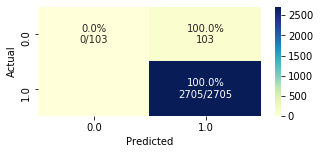

In [62]:
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test_d), columns=np.unique(y_test_d))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

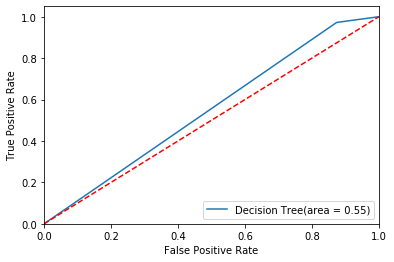

In [63]:
logit_roc_auc = roc_auc_score(y_test_d, clf.predict(X_test_d))
fpr, tpr, thresholds = roc_curve(y_test_d, clf.predict_proba(X_test_d)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train_d, y_train_d)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test_d)
# Calculate the absolute errors
errors = abs(predictions - y_test_d)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.04 degrees.


In [66]:
y_pred = model.predict(X_test_d)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test_d, y_pred))

Accuracy: 0.9640313390313391


In [68]:
cm

Predicted,0.0,1.0
Actual,,
0.0,0,103
1.0,0,2705


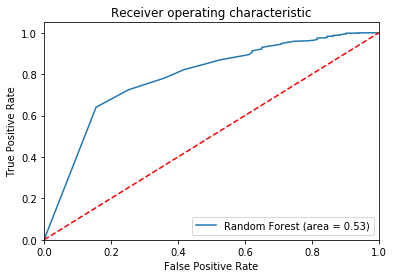

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_d, model.predict(X_test_d))
fpr, tpr, thresholds = roc_curve(y_test_d, model.predict_proba(X_test_d)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()